In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [68]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [69]:
data = data.dropna()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<ipython-input-71-56b9aea354db>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




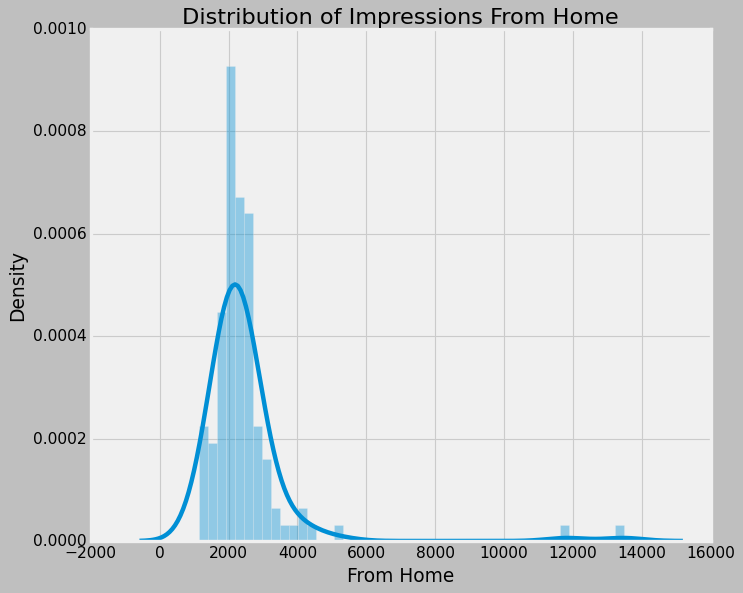

In [71]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

<ipython-input-72-8c45b7b41edc>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




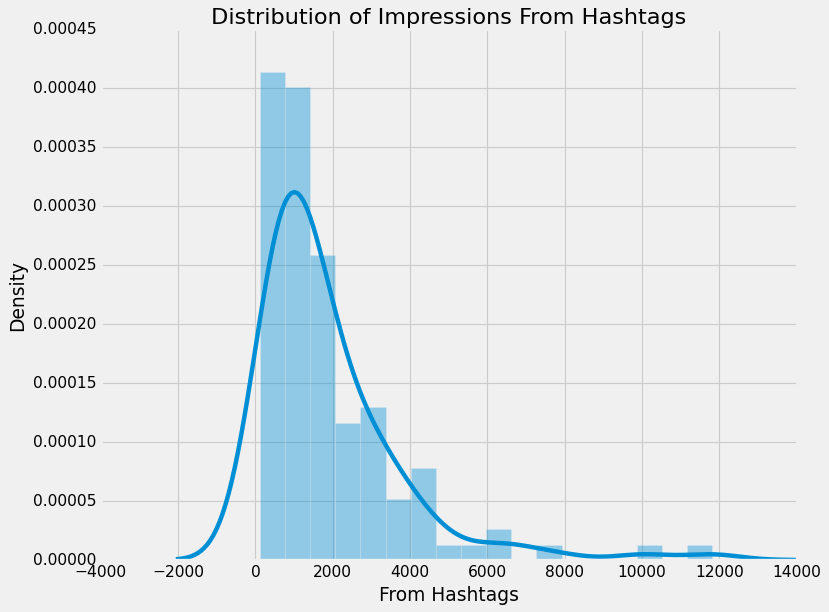

In [72]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

<ipython-input-73-3461ec84008d>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




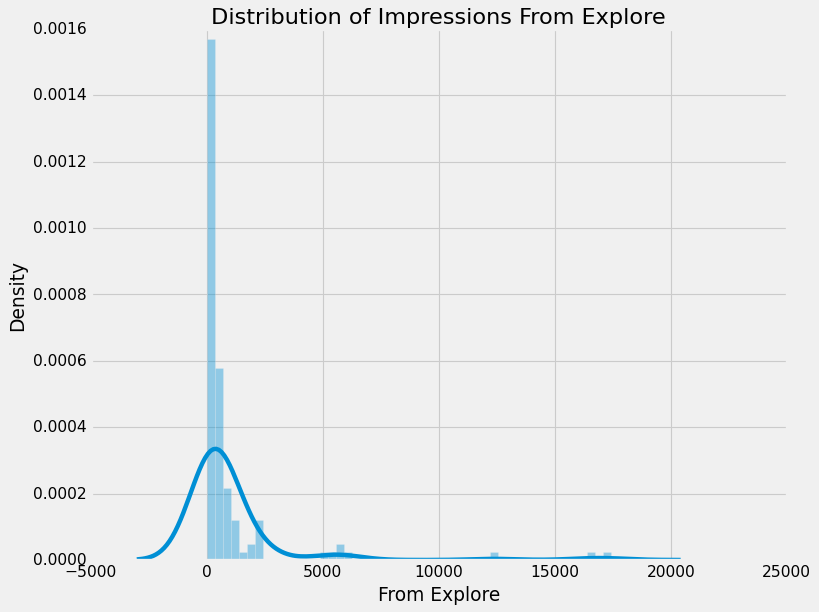

In [73]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [74]:
import plotly.express as px

# Assuming 'data' is your DataFrame containing the data

# Calculate sum of each source
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

# Labels and values for the pie chart
labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

# Define shades of red for the custom color palette
colors = ['#FF5733', '#FF8C66', '#FFAF99', '#FFCCB3']  # Varying shades of red

# Create pie chart
fig = px.pie(values=values, names=labels, title='Impressions on Instagram Posts From Various Sources', hole=0.5,
             color_discrete_sequence=colors)
fig.show()


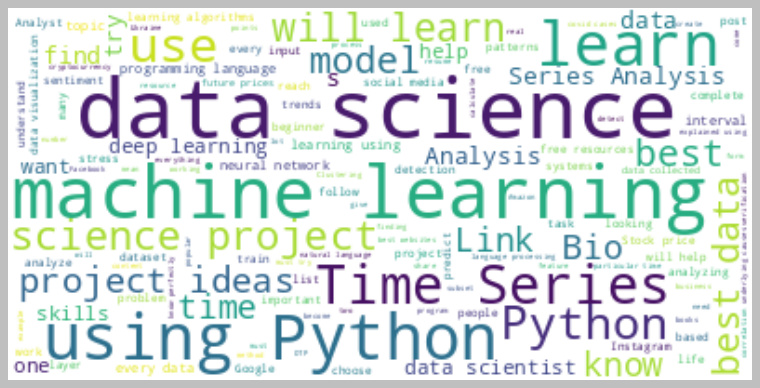

In [75]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

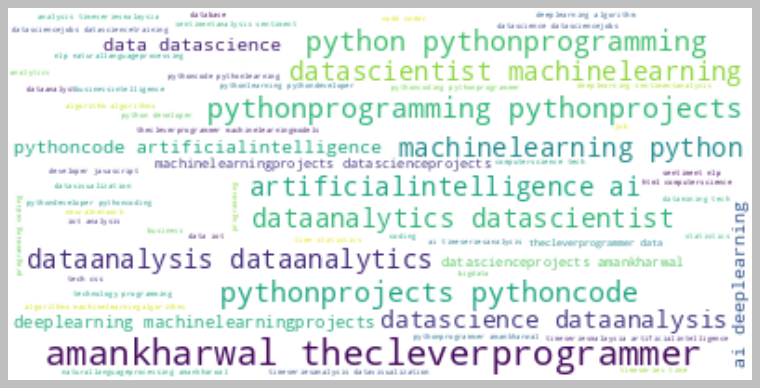

In [76]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [77]:
import plotly.express as px

# Assuming 'data' is your DataFrame containing the data

# Create scatter plot
figure = px.scatter(data_frame=data, x="Impressions", y="Likes",
                    trendline="ols",
                    title="Relationship Between Likes and Impressions",
                    color_discrete_sequence=["red"],
                    size="Likes")  # Specify column to determine dot sizes

# Update trendline color to black
figure.update_traces(line=dict(color='black'))

# Show plot
figure.show()


In [78]:
import plotly.express as px

# Assuming 'data' is your DataFrame containing the data

# Create scatter plot
figure = px.scatter(data_frame=data, x="Impressions", y="Comments",
                    trendline="ols",
                    title="Relationship Between Comments and Total Impressions",
                    color_discrete_sequence=["red"],
                    size="Comments")  # Specify column to determine dot sizes

# Update trendline color to black
figure.update_traces(line=dict(color='black'))

# Show plot
figure.show()


In [79]:
import plotly.express as px

# Assuming 'data' is your DataFrame containing the data

# Create scatter plot
figure = px.scatter(data_frame=data, x="Impressions", y="Shares",
                    trendline="ols",
                    title="Relationship Between Shares and Total Impressions",
                    color_discrete_sequence=["red"],
                    size="Shares")  # Specify column to determine dot sizes

# Update trendline color to black
figure.update_traces(line=dict(color='black'))

# Show plot
figure.show()


In [80]:
import plotly.express as px

# Assuming 'data' is your DataFrame containing the data

# Create scatter plot
figure = px.scatter(data_frame=data, x="Impressions", y="Saves",
                    trendline="ols",
                    title="Relationship Between Post Saves and Total Impressions",
                    color_discrete_sequence=["red"],
                    size="Saves")  # Specify column to determine dot sizes

# Update trendline color to black
figure.update_traces(line=dict(color='black'))

# Show plot
figure.show()


In [81]:
# Drop non-numeric columns or convert them to numeric type
numeric_data = data.apply(pd.to_numeric, errors='coerce').dropna()

# Calculate correlation matrix
correlation = numeric_data.corr()

# Print correlation values for the "Impressions" column
print(correlation["Impressions"].sort_values(ascending=False))


Impressions      NaN
From Home        NaN
From Hashtags    NaN
From Explore     NaN
From Other       NaN
Saves            NaN
Comments         NaN
Shares           NaN
Likes            NaN
Profile Visits   NaN
Follows          NaN
Caption          NaN
Hashtags         NaN
Name: Impressions, dtype: float64


In [82]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [83]:
import plotly.express as px

# Assuming 'data' is your DataFrame containing the data

# Create scatter plot with different sizes for dots
figure = px.scatter(data_frame=data, x="Profile Visits", y="Follows",
                    trendline="ols",
                    title="Relationship Between Profile Visits and Followers Gained",
                    color_discrete_sequence=["red"],
                    size="Follows")  # Specify column to determine dot sizes

# Update trendline color to black
figure.update_traces(line=dict(color='black'))

# Show plot
figure.show()


In [84]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [85]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9083604445008142

In [86]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11651.81180162])